# Síntese de Áudio - Introdução

Uma vez que sinais amostrados são sequências numéricas, é imediato pensar que poderíamos calcular sequências numéricas e então ouvir seu resultado sonoro. Em termos técnicos, isso é sempre possível -- basta alimentar a saída da placa de som de um computador com números quaisquer. Porém, é útil pensar em formas de síntese à partir das propriedades sonoras que desejamos obter na saída.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import IPython

In [2]:
## some consstant for our audio file 

rate = 44100 #44.1 khz
duration =5 # in sec

time = np.linspace(0,duration, num=rate*duration)

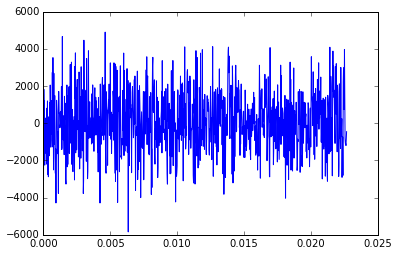

In [3]:
rand_noise = 2**13*0.2*np.random.randn(rate*duration)

# look at it on the first 25 ms
plt.plot(time[0:1000], rand_noise[0:1000])

# write the file on disk, and show in in a Html 5 audio player
wavfile.write('whitenoise.wav', rate, rand_noise.astype(np.int16))
IPython.display.Audio("whitenoise.wav")

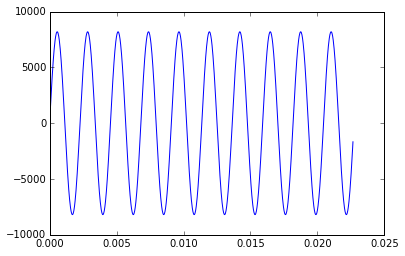

In [4]:
# define A as a 440 Hz sin function
f = 440
la    = 2**13*np.sin(2*np.pi*f*time)

# look at it on the first 25 ms
plt.plot(time[0:1000], la[0:1000])

# write the file on disk, and show in in a Html 5 audio player
wavfile.write('440.wav', rate, la.astype(np.int16))
IPython.display.Audio("440.wav")


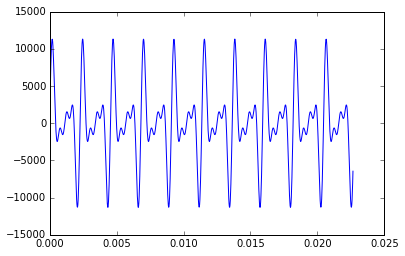

In [10]:
# define A as a 440 Hz sin function
f = 440
la = 2**13* (0.2*np.sin(2*np.pi*f*time) + 0.6*np.sin(2*np.pi*2*f*time) + 0.5*np.sin(2*np.pi*3*f*time)\
             + 0.3*np.sin(2*np.pi*4*f*time))

# look at it on the first 25 ms
plt.plot(time[0:1000], la[0:1000])

# write the file on disk, and show in in a Html 5 audio player
wavfile.write('440_timbrado.wav', rate, la.astype(np.int16))
IPython.display.Audio("440_timbrado.wav")
 

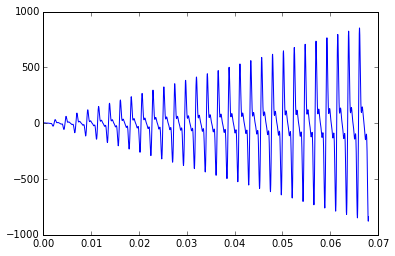

In [6]:
# define A as a 440 Hz sin function
f = 440
la = 2**13* (0.7*np.sin(2*np.pi*f*time) + 0.6*np.sin(2*np.pi*2*f*time) + 0.5*np.sin(2*np.pi*3*f*time)\
             + 0.2*np.sin(2*np.pi*4*f*time))
# Depois: testar fundamental nula

# envoltoria
attack = 1.
decay = 0.01
sustain = 0.2
release = 2.5

env_attack = np.linspace(0, 1.0, np.ceil(attack * rate))
env_decay = np.linspace(1.0, sustain, np.ceil(decay * rate))
env_release = np.linspace(sustain, 0.0, np.ceil(release * rate))
env_sustain = sustain * np.ones(len(la) - len(env_attack) - len(env_decay) - len(env_release))
env = np.hstack((env_attack, env_decay, env_sustain, env_release))

lc = la * env
lc = lc[0:len(env)]
# look at it on the first 25 ms
plt.plot(time[0:3000], lc[0:3000])

# write the file on disk, and show in in a Html 5 audio player
wavfile.write('440_timbrado_adsr.wav', rate, lc.astype(np.int16))
IPython.display.Audio("440_timbrado_adsr.wav")

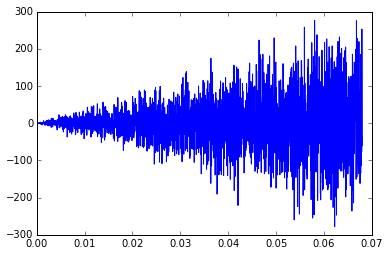

In [7]:
noise_env = rand_noise * env

# look at it on the first 25 ms
plt.plot(time[0:3000], noise_env[0:3000])
# write the file on disk, and show in in a Html 5 audio player
wavfile.write('noise_adsr.wav', rate, noise_env.astype(np.int16))
IPython.display.Audio("noise_adsr.wav")

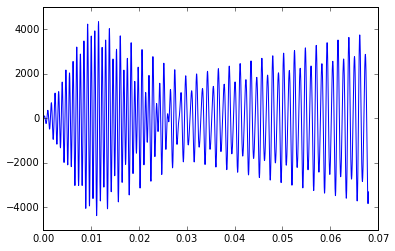

In [8]:
# magnitude
mag = [0.7, 0.6, 0.5] # Depois: testar fundamental nula

# envoltoria
attack = [1.5, 0.1, 0.01]
decay = [1.5, 0.1, 0.02]
sustain = [0.8, 0.5, 0.1]
release = [1, 4.6, 4.7]

acc = None
f0 = 440
f = 0
for x in xrange(len(mag)):
    f += f0
    local = np.sin(2*np.pi*f*time)
    local *= mag[x]
    
    env_attack = np.linspace(0, 1.0, np.ceil(attack[x] * rate))
    env_decay = np.linspace(1.0, sustain[x], np.ceil(decay[x] * rate))
    env_release = np.linspace(sustain[x], 0.0, np.ceil(release[x] * rate))
    env_sustain = sustain[x] * np.ones(len(local) - len(env_attack) - len(env_decay) - len(env_release))
    env = np.hstack((env_attack, env_decay, env_sustain, env_release))
    
    local *= env
    if acc is None:
        acc = local
    else:
        acc += local
            
acc = acc * (2**13)
            
# look at it on the first 25 ms
plt.plot(time[0:3000], acc[0:3000])

# write the file on disk, and show in in a Html 5 audio player
wavfile.write('440_timbrado_adsr_multiplo.wav', rate, acc.astype(np.int16))
IPython.display.Audio("440_timbrado_adsr_multiplo.wav")